In [85]:
import os               
import time             
import uuid 
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as img
import tensorflow 
import json
import numpy as np
import keras 
import albumentations as alb
import tensorflow as tf
import codecs, json 

In [6]:
img = cv2.imread(os.path.join('E:\computer-vision\main-dataset','TRAINING','sundar','7a848e37-81c1-11ed-954c-ac2b6e5b8357.jpg' ))

In [8]:
img.shape

(480, 640, 3)

In [87]:
with open(os.path.join('E:\computer-vision\main-dataset','TRAINING', 'LABELS', '7a848e37-81c1-11ed-954c-ac2b6e5b8357.json'), 'r') as f:
    label = json.load(f)

In [88]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[307.05583756345175, 8.527918781725894],
    [549.6954314720812, 296.34517766497464]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\IMAGES\\7a848e37-81c1-11ed-954c-ac2b6e5b8357.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZH

In [8]:
coords = [0,0,0,0]   #first here i define the empty list with 4 elements
coords[0] = label['shapes'][0]['points'][0][0] #stores the 1 st coordinate as 1st element in list  X1
coords[1] = label['shapes'][0]['points'][0][1]  #stores the 2nd coordinate as  2nd element in list  Y1
coords[2] = label['shapes'][0]['points'][1][0]  #stores the 3rd coordinate as  3rd element in list  X2
coords[3] = label['shapes'][0]['points'][1][1]  #stores the 4th coordinate as 4th elememt in list   Y2

In [9]:
coords

[307.05583756345175, 8.527918781725894, 549.6954314720812, 296.34517766497464]

setup albumentations transform pipeline 

In [3]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [16]:
img = cv2.imread(os.path.join('E:\computer-vision\main-dataset','TRAINING','sundar','7a848e37-81c1-11ed-954c-ac2b6e5b8357.jpg' ))


In [98]:
with open(os.path.join('E:\computer-vision\main-dataset','TRAINING', 'LABELS', '7a848e37-81c1-11ed-954c-ac2b6e5b8357.json'), 'r') as f:
    label = json.load(f)

In [99]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[307.05583756345175, 8.527918781725894],
    [549.6954314720812, 296.34517766497464]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\IMAGES\\7a848e37-81c1-11ed-954c-ac2b6e5b8357.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZH

In [28]:
label['shapes'][0]['points']

[[307.05583756345175, 8.527918781725894],
 [549.6954314720812, 296.34517766497464]]

extarct coordinates and rescale to match image resolution

In [29]:
coords = [0,0,0,0]   #first here i define the empty list with 4 elements
coords[0] = label['shapes'][0]['points'][0][0] #stores the 1 st coordinate as 1st element in list  X1
coords[1] = label['shapes'][0]['points'][0][1]  #stores the 2nd coordinate as  2nd element in list  Y1
coords[2] = label['shapes'][0]['points'][1][0]  #stores the 3rd coordinate as  3rd element in list  X2
coords[3] = label['shapes'][0]['points'][1][1]  #stores the 4th coordinate as 4th elememt in list   Y2

In [30]:
coords

[307.05583756345175, 8.527918781725894, 549.6954314720812, 296.34517766497464]

In [56]:
NOR_COORDS = list(np.divide(coords ,[640,480,640,480]))
print(NOR_COORDS)

[0.0006133258645304567, 0.00030580231246474905, 0.0009987458359771574, 0.001301642695995488]


apply augmentation

In [49]:
augmented = augmentor(image=img, bboxes=[NOR_COORDS], class_labels=['Face'])

In [119]:
augmented['image']

array([[[146, 146, 140],
        [149, 149, 143],
        [153, 150, 145],
        ...,
        [ 29,  24,  26],
        [ 25,  22,  24],
        [ 24,  21,  23]],

       [[151, 151, 145],
        [153, 153, 147],
        [156, 153, 148],
        ...,
        [ 31,  26,  28],
        [ 29,  26,  28],
        [ 27,  24,  26]],

       [[153, 150, 145],
        [154, 151, 146],
        [154, 151, 146],
        ...,
        [ 31,  26,  28],
        [ 32,  27,  29],
        [ 29,  24,  26]],

       ...,

       [[153, 154, 152],
        [153, 154, 152],
        [149, 150, 148],
        ...,
        [194, 213, 210],
        [192, 211, 208],
        [192, 211, 208]],

       [[153, 154, 152],
        [154, 155, 153],
        [153, 154, 152],
        ...,
        [196, 213, 210],
        [192, 209, 205],
        [191, 208, 204]],

       [[151, 152, 150],
        [152, 153, 151],
        [154, 155, 153],
        ...,
        [197, 214, 211],
        [193, 210, 206],
        [192, 209, 205]]

In [50]:
augmented['class_labels']

['Face']

In [47]:
augmented['bboxes'][0]

(0.022899041173153, 0.0, 0.562098138747885, 0.6207670614777214)

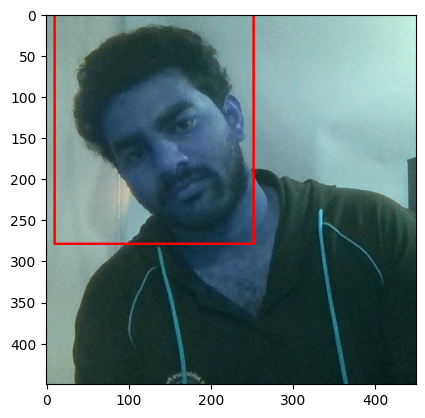

In [44]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

Build and Run augmented pipeline 

In [ ]:
cv2.imwrite(os.path.join('E:\\computer-vision\\aug-dataset','TRAINING', 'sundar', f'{p.split(".")[0]}.{x}.jpg'), augmented['image'])

In [135]:
for partition in ['TEST','TRAINING','VALIDATION']: 
    for image in os.listdir(os.path.join('E:\\computer-vision\\main-dataset', partition, 'sundar')):
        #print(p)
        #img = cv2.imread(os.path.join('E:\computer-vision\main-dataset','TRAINING','sundar','7a848e37-81c1-11ed-954c-ac2b6e5b8357.jpg' ))
        img1 = cv2.imread(os.path.join('E:\\computer-vision\\main-dataset', partition, 'sundar', p))
        #print(img1)

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('E:\\computer-vision\\main-dataset', partition, 'LABELS', f'{p.split(".")[0]}.json')
        #print(label_path)
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
            #print(coords)

        try: 
            for x in range(20):
                augmented = augmentor(images = img1, bboxes=[coords], class_labels=['Face'])
                #print(augmented)
                #print(augmented['images'])
                cv2.imwrite(os.path.join('E:\\computer-vision\\aug-dataset', partition, 'sundar', f'{p.split(".")[0]}.{x}.jpg'), augmented['image'])
                augmented.keys()[0]
                #print((augmented)['image'].shape)
                #print(augmented['bboxes'][0])
                
                annotation = {}
                
                #print(type(annotation))
                
                annotation['images'] = image
                

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('E:\\computer-vision\\aug-dataset', partition, 'LABELS', f'{p.split(".")[0]}.{x}.json'), 'w') as f:
                    print(f)
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'
'image'


In [82]:
for partition in ['TEST','TRAINING','VALIDATION']: 
    for p in os.listdir(os.path.join('E:\\computer-vision\\main-dataset', partition, 'sundar')):
        img1 = cv2.imread(os.path.join('E:\\computer-vision\\main-dataset', partition, 'sundar', p))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('E:\\computer-vision\\main-dataset', partition, 'LABELS', f'{p.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

loading the images to tensorflow dataset 

In [108]:
def load_image(x): 
    byte_img = tensorflow.io.read_file(x)
    img = tensorflow.io.decode_jpeg(byte_img)
    return img

In [136]:
train_images = tf.data.Dataset.list_files('E:\\computer-vision\\aug-dataset\\TRAINING\\sundar\\*.jpg',shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x ,(120,120)))
train_images = train_images.map (lambda x:x/255)

In [137]:
test_images = tf.data.Dataset.list_files('E:\\computer-vision\\aug-dataset\\TEST\\sundar\\*.jpg',shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x : tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x:x/255)

In [138]:
val_images = tf.data.Dataset.list_files('E:\\computer-vision\\aug-dataset\\VALIDATION\\sundar\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [141]:
train_images.as_numpy_iterator().next()

array([[[0.06721814, 0.04761029, 0.0726103 ],
        [0.07971814, 0.06011029, 0.08511029],
        [0.07579657, 0.05128676, 0.07873774],
        ...,
        [0.07714461, 0.06832108, 0.09430147],
        [0.09656863, 0.08480392, 0.1122549 ],
        [0.09503677, 0.08480392, 0.10919118]],

       [[0.06875   , 0.053125  , 0.08970588],
        [0.07659314, 0.05453431, 0.0932598 ],
        [0.07493872, 0.05140932, 0.090625  ],
        ...,
        [0.08376226, 0.07984069, 0.1033701 ],
        [0.09454657, 0.08376226, 0.11072304],
        [0.1       , 0.0882353 , 0.11568628]],

       [[0.06764706, 0.0596201 , 0.07959559],
        [0.05925245, 0.05134804, 0.07107843],
        [0.07003676, 0.06213235, 0.08186275],
        ...,
        [0.07493872, 0.07101715, 0.09454657],
        [0.09019608, 0.08627451, 0.10980392],
        [0.09338235, 0.08946078, 0.11789215]],

       ...,

       [[0.98039216, 1.        , 0.99607843],
        [0.9764706 , 1.        , 1.        ],
        [0.9647059 , 1

6. Prepare Labels

labels loading into pipeline

In [142]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [146]:
train_labels = tf.data.Dataset.list_files('E:\\computer-vision\\aug-dataset\\TRAINING\\LABELS\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [153]:
train_labels.as_numpy_iterator().next()[0]

array([1], dtype=uint8)

In [152]:
test_labels = tf.data.Dataset.list_files('E:\\computer-vision\\aug-dataset\\TEST\\LABELS\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [148]:
val_labels = tf.data.Dataset.list_files('E:\\computer-vision\\aug-dataset\\VALIDATION\\LABELS\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [149]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.349 , 0.436 , 0.8916, 0.992 ], dtype=float16))

7) combining labels and 

image samples 


In [154]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(380, 380, 57, 57, 95, 95)

create final dataset (images/labels)

In [155]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [156]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [157]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [191]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.413 , 0.    , 0.966 , 0.6016],
        [0.1887, 0.    , 0.6816, 0.57  ],
        [0.2717, 0.3926, 0.6216, 0.8823],
        [0.    , 0.3228, 0.469 , 0.977 ],
        [0.5073, 0.    , 1.    , 0.553 ],
        [0.3464, 0.4395, 0.9478, 0.993 ],
        [0.    , 0.    , 0.4814, 0.5786],
        [0.    , 0.4373, 0.5737, 0.991 ]], dtype=float16))

view images and annotations

In [183]:
data_samples = train.as_numpy_iterator()

In [184]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


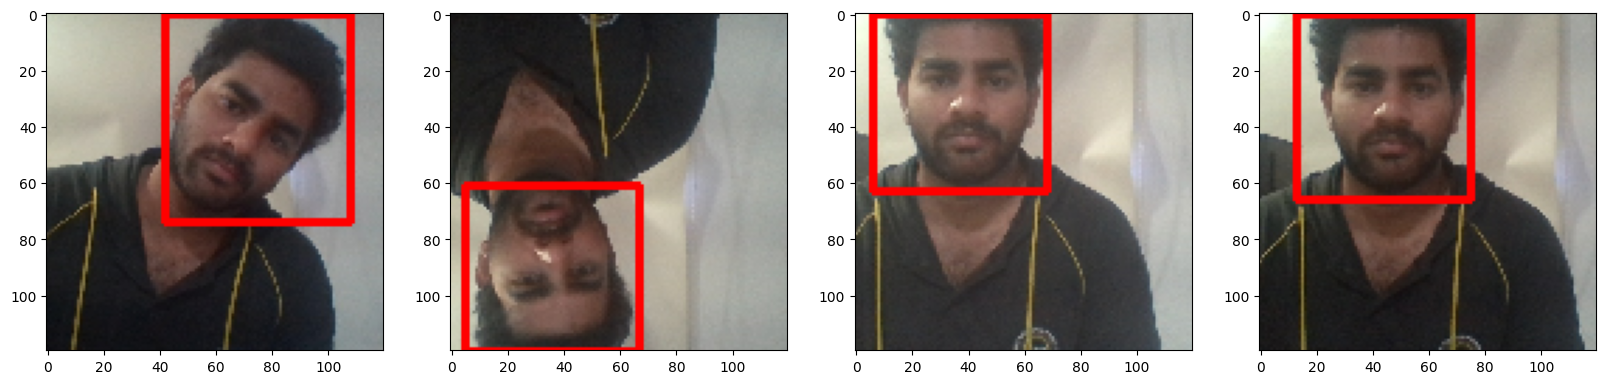

In [185]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

8. Build Deep
 Learning using 
 
 the Functional API

8.1 Import Layers and Base Network

In [186]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

8.2 Download VGG16

In [187]:
vgg = VGG16(include_top=False)

In [188]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

 Build instance of Network

In [189]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker 

In [192]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.4353  , 0.      , 0.979   , 0.597   ],
        [0.012215, 0.3782  , 0.556   , 1.      ],
        [0.448   , 0.4016  , 0.8936  , 0.863   ],
        [0.2605  , 0.00326 , 0.7783  , 0.6035  ],
        [0.3115  , 0.1414  , 0.676   , 0.616   ],
        [0.2913  , 0.01006 , 0.8306  , 0.6494  ],
        [0.      , 0.4336  , 0.3704  , 1.      ],
        [0.2458  , 0.      , 0.882   , 0.6387  ]], dtype=float16))

test our


neural network

In [193]:
facetracker = build_model()

In [194]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [195]:
X, y = train.as_numpy_iterator().next()

In [196]:
X.shape


(8, 120, 120, 3)

In [197]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [198]:
classes, coords

(array([[0.6544722 ],
        [0.7155837 ],
        [0.637848  ],
        [0.6787179 ],
        [0.65658015],
        [0.6970495 ],
        [0.6739662 ],
        [0.65968543]], dtype=float32),
 array([[0.5734545 , 0.54493296, 0.39801517, 0.4968836 ],
        [0.5477201 , 0.5576207 , 0.3014754 , 0.57400167],
        [0.50208914, 0.5603873 , 0.3143265 , 0.53656286],
        [0.5647941 , 0.5329952 , 0.28031236, 0.63914055],
        [0.48021293, 0.5488563 , 0.36342144, 0.5476852 ],
        [0.51351804, 0.48749247, 0.41962802, 0.51059276],
        [0.5751733 , 0.5409025 , 0.3832019 , 0.528053  ],
        [0.53176284, 0.51466805, 0.3637229 , 0.5431467 ]], dtype=float32))

Define Losses and Optimizers


 Define Optimizer and LR

In [200]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [204]:
opt =  tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)


Create Localization Loss and Classification Loss

In [205]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [206]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

 Test out Loss Metrics

In [209]:
localization_loss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=8.649147>

In [210]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.39849538>

In [211]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.649147>

 Train Neural Network

Create Custom Model Class

In [213]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [215]:
model = FaceTracker(facetracker)

In [216]:
model.compile(opt, classloss, regressloss) 

Train

In [217]:
logdir='logs'

In [218]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [219]:

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
48/48 [==============================] - 225s 5s/step - total_loss: 0.6970 - class_loss: 0.0232 - regress_loss: 0.6854 - val_total_loss: 0.1430 - val_class_loss: 1.8778e-04 - val_regress_loss: 0.1429
Epoch 2/10
48/48 [==============================] - 216s 4s/step - total_loss: 0.1084 - class_loss: 7.3912e-05 - regress_loss: 0.1083 - val_total_loss: 0.0483 - val_class_loss: 3.3610e-05 - val_regress_loss: 0.0483
Epoch 3/10
48/48 [==============================] - 228s 5s/step - total_loss: 0.0540 - class_loss: 4.7149e-05 - regress_loss: 0.0539 - val_total_loss: 0.0737 - val_class_loss: 6.4403e-05 - val_regress_loss: 0.0736
Epoch 4/10
48/48 [==============================] - 229s 5s/step - total_loss: 0.0330 - class_loss: 2.9447e-05 - regress_loss: 0.0329 - val_total_loss: 0.0549 - val_class_loss: 6.8631e-06 - val_regress_loss: 0.0549
Epoch 5/10
48/48 [==============================] - 216s 4s/step - total_loss: 0.0200 - class_loss: 2.0607e-05 - regress_loss: 0.0200 - val_tota

In [220]:
hist.history 

{'total_loss': [0.20583893358707428,
  0.022617502138018608,
  0.029293671250343323,
  0.019562242552638054,
  0.009878180921077728,
  0.00731399143114686,
  0.01121581718325615,
  0.0049863154999911785,
  0.00643129413947463,
  0.00275886501185596],
 'class_loss': [0.0002755488967522979,
  3.3200518373632804e-05,
  2.4036262402660213e-05,
  5.885994596610544e-06,
  1.5139758033910766e-05,
  1.977459578483831e-05,
  9.894458344206214e-06,
  8.523533324478194e-06,
  6.049921466910746e-06,
  6.7503015088732354e-06],
 'regress_loss': [0.20570115745067596,
  0.022600902244448662,
  0.029281653463840485,
  0.01955929957330227,
  0.009870611131191254,
  0.007304104045033455,
  0.011210869997739792,
  0.004982053767889738,
  0.006428269203752279,
  0.0027554898988455534],
 'val_total_loss': [0.1430201232433319,
  0.04828670248389244,
  0.07365363836288452,
  0.054881978780031204,
  0.06957082450389862,
  0.025489477440714836,
  0.04855272173881531,
  0.03865707665681839,
  0.03945823758840561

ploting

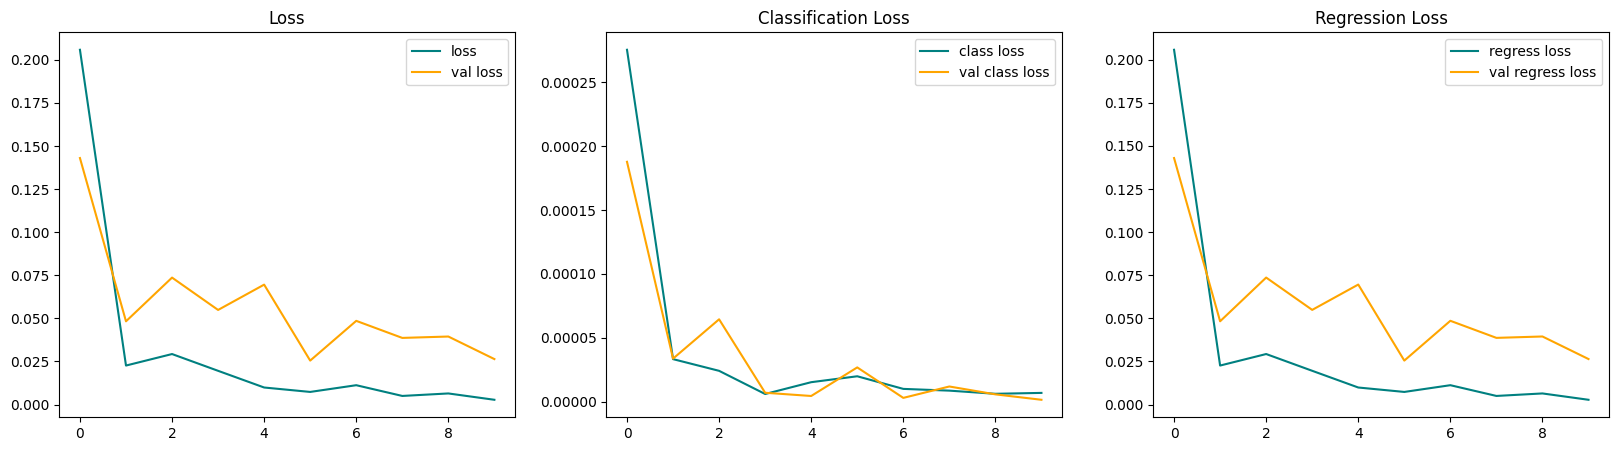

In [275]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

Make Predictions

In [313]:
test_data = test.as_numpy_iterator()

In [314]:
test_sample = test_data.next()

In [315]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


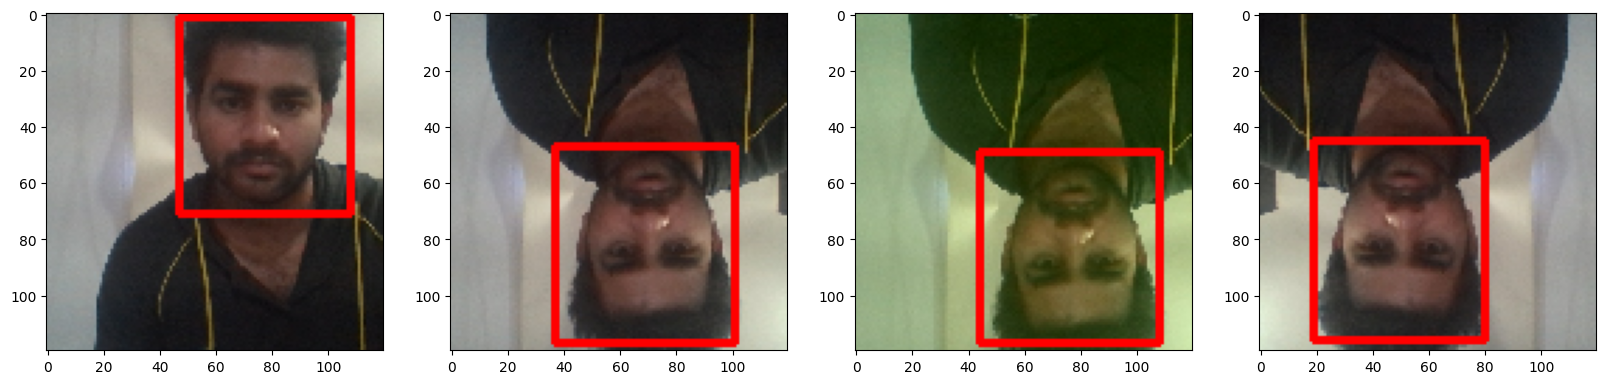

In [323]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [273]:
from tensorflow.keras.models import load_model

In [274]:
facetracker.save('facetracker.h5')

In [228]:
facetracker = load_model('facetracker.h5')


Real Time Detection

In [321]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable